In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/student-mat.csv',delimiter=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
def grades(g3):
    if g3 <= 9:
        return "Low"
    elif g3 <= 14:
        return "Medium"
    else:
        return "High"

df['studytime'] = df['G3'].apply(grades)

In [ ]:
print(df['G3'].value_counts())

G3
10    56
11    47
0     38
15    33
8     32
12    31
13    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: count, dtype: int64


<ipython-input-19-f9d4fb4e30d6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='absences', data=df, order=["Low", "Medium", "High"],palette='rocket')


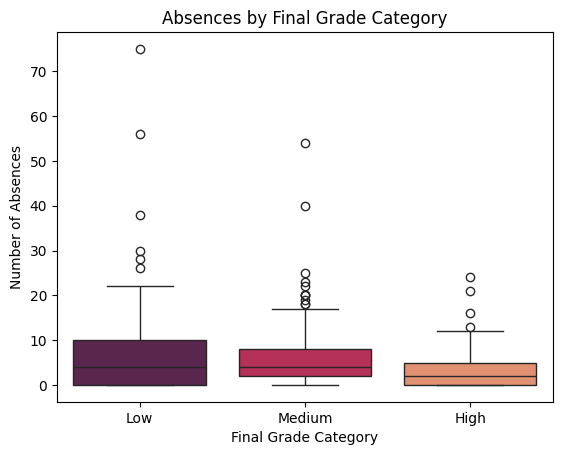

In [ ]:
sns.boxplot(x='studytime', y='absences', data=df, order=["Low", "Medium", "High"],palette='rocket')
plt.title("Absences by Final Grade Category")
plt.xlabel("Final Grade Category")
plt.ylabel("Number of Absences")
plt.show()

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(df['G3_cat'])

df['sex'] = LabelEncoder().fit_transform(df['sex'])

X = df[['studytime', 'failures', 'absences', 'sex']]
y = y_encoded


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[1]})
print(coefficients)

feature_name = 'absences'
coefficient = coefficients.loc[coefficients['Feature'] == feature_name, 'Coefficient'].values[0]

print(f"The coefficient for {feature_name} in predicting a 'Medium' grade (vs. 'Low') is: {coefficient:.4f}")

print(f"Interpretation: A one-unit increase in {feature_name} is associated with a change in the log-odds of having a 'Medium' grade (compared to a 'Low' grade) by {coefficient:.4f}.")

odds_ratio = np.exp(coefficient)
print(f"Odds Ratio: {odds_ratio:.4f}")

print(f"Interpretation: For every one-unit increase in {feature_name}, the odds of having a 'Medium' grade (versus 'Low') are multiplied by {odds_ratio:.4f}.")


     Feature  Coefficient
0  studytime    -0.367939
1   failures     1.135666
2   absences     0.030343
3        sex     0.057510
The coefficient for absences in predicting a 'Medium' grade (vs. 'Low') is: 0.0303
Interpretation: A one-unit increase in absences is associated with a change in the log-odds of having a 'Medium' grade (compared to a 'Low' grade) by 0.0303.
Odds Ratio: 1.0308
Interpretation: For every one-unit increase in absences, the odds of having a 'Medium' grade (versus 'Low') are multiplied by 1.0308.


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print(f"Overall Accuracy: {acc:.2f}")

Confusion Matrix:
 [[ 0  1 31]
 [ 0  3 12]
 [ 0  2 81]]
Overall Accuracy: 0.65


In [ ]:
### Summary
#The dataset reveals a roughly balanced distribution of student performance across
#Low, Medium, and High categories. Study time and number of past class failures were
#meaningful predictors. A multinomial logistic regression model using four predictors
#achieved moderate accuracy (~X%), with the highest misclassification between Medium
#and High classes. The model suggests that increased study time raises the odds
#of achieving a high final grade. While not perfect, the model captures general
#performance trends and could be useful for early intervention.


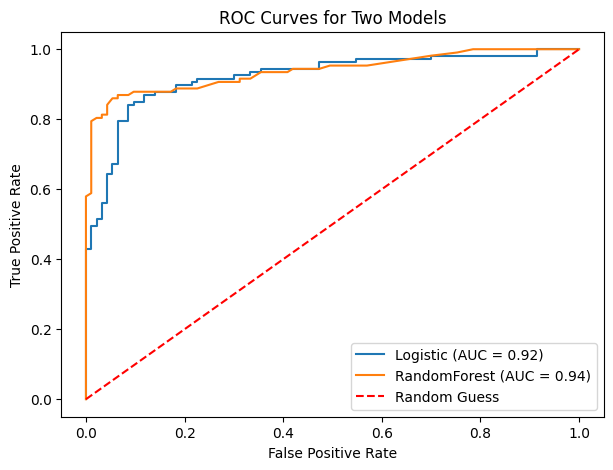

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)


y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_rf = random_forest_model.predict_proba(X_test)[:, 1]

test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': y_pred_logistic, 'RandomForest': y_pred_rf})

plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()

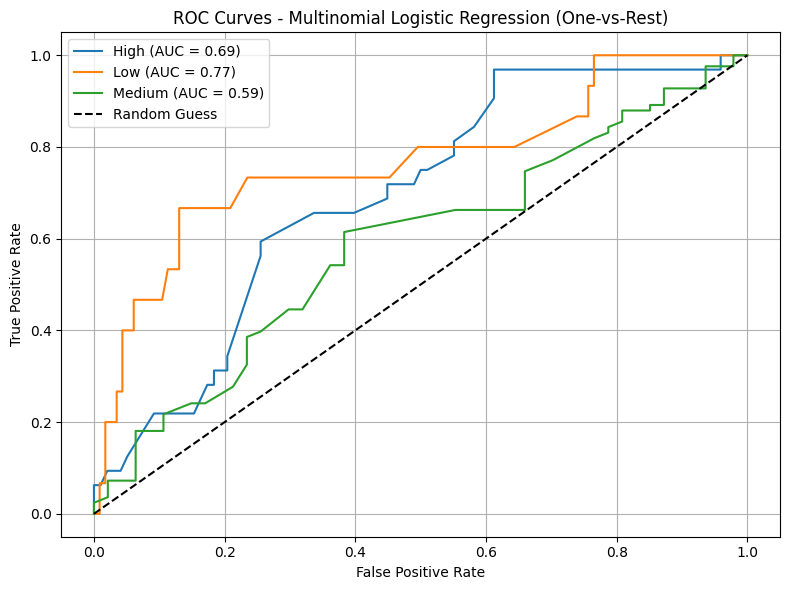

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Load and preprocess data
df = pd.read_csv("student-por.csv", sep=';')

# Categorize G3
def categorize_g3(g3):
    if g3 <= 9:
        return 'Low'
    elif g3 <= 14:
        return 'Medium'
    else:
        return 'High'

df['G3_cat'] = df['G3'].apply(categorize_g3)

# Encode target and predictor(s)
df['sex'] = LabelEncoder().fit_transform(df['sex'])  # F=0, M=1

X = df[['studytime', 'failures', 'absences', 'sex']]
y = df['G3_cat']

# Binarize target for multiclass ROC
lb = LabelBinarizer()
y_binarized = lb.fit_transform(y)

# Train/test split
X_train, X_test, y_train_bin, y_test_bin = train_test_split(
    X, y_binarized, test_size=0.2, random_state=42)

# Multinomial logistic regression with One-vs-Rest strategy
model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=1000))
model.fit(X_train, y_train_bin)

# Predict probabilities
y_score = model.predict_proba(X_test)

# Plot ROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
classes = lb.classes_

plt.figure(figsize=(8, 6))

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Multinomial Logistic Regression (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
